In [1]:
%load_ext autoreload
%autoreload 2
!RUST_BACKTRACE=1 cargo run -- ../models/quadrotor.mo -t ../templates/dae_builder6.jinja > quadrotor_casadi.py

    Finished `dev` profile [unoptimized + debuginfo] target(s) in 0.05s
     Running `/home/micah/Research/parol/rumoca_parol/target/debug/rumoca ../models/quadrotor.mo -t ../templates/dae_builder6.jinja`


In [93]:
!RUST_BACKTRACE=1 cargo run -- -v ../models/quadrotor.mo > quadrotor.json

    Finished ]8;;https://doc.rust-lang.org/cargo/reference/profiles.html#default-profiles\`dev` profile [unoptimized + debuginfo]]8;;\ target(s) in 0.09s
     Running `/home/micah/Research/parol/rumoca_parol/target/debug/rumoca -v ../models/quadrotor.mo`


In [2]:
import quadrotor_casadi
import numpy as np
import matplotlib.pyplot as plt

/home/micah/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
states = model.dae.x()
model.dae.start(states)

NameError: name 'model' is not defined

nx = 16, nz = 0, nq = 0, ny = 0, np = 24, nc = 0, nd = 0, nw = 34, nu = 4
Model variables:
  t = [time]
  p = [l, mix_a, mix_e, mix_r, mix_t, m, g, J_x, J_y, J_z, J_xz, Lambda, m_1_Cm, m_1_Ct, m_1_tau, m_2_Cm, m_2_Ct, m_2_tau, m_3_Cm, m_3_Ct, m_3_tau, m_4_Cm, m_4_Ct, m_4_tau]
  x = [x, y, h, P, Q, R, U, V, W, phi, theta, psi, m_1_omega, m_2_omega, m_3_omega, m_4_omega]
  w = [F_x, F_y, m_1_thrust, m_2_thrust, m_3_thrust, m_4_thrust, F_z, M_x, M_y, m_1_moment, m_2_moment, m_3_moment, m_4_moment, M_z, m_1_omega_ref, m_2_omega_ref, m_3_omega_ref, m_4_omega_ref, der(x), der(y), der(h), der(U), der(V), der(W), der(phi), der(theta), der(psi), der(P), der(Q), der(R), der(m_1_omega), der(m_2_omega), der(m_3_omega), der(m_4_omega)]
  u = [a, e, r, t]
List of dependent variables (w):
  F_x := (-((m*g)*sin(theta)))
  F_y := (((m*g)*sin(phi))*cos(theta))
  m_1_thrust := ((m_1_Ct*m_1_omega)*m_1_omega)
  m_2_thrust := ((m_2_Ct*m_2_omega)*m_2_omega)
  m_3_thrust := ((m_3_Ct*m_3_omega)*m_3_omega)
  m_

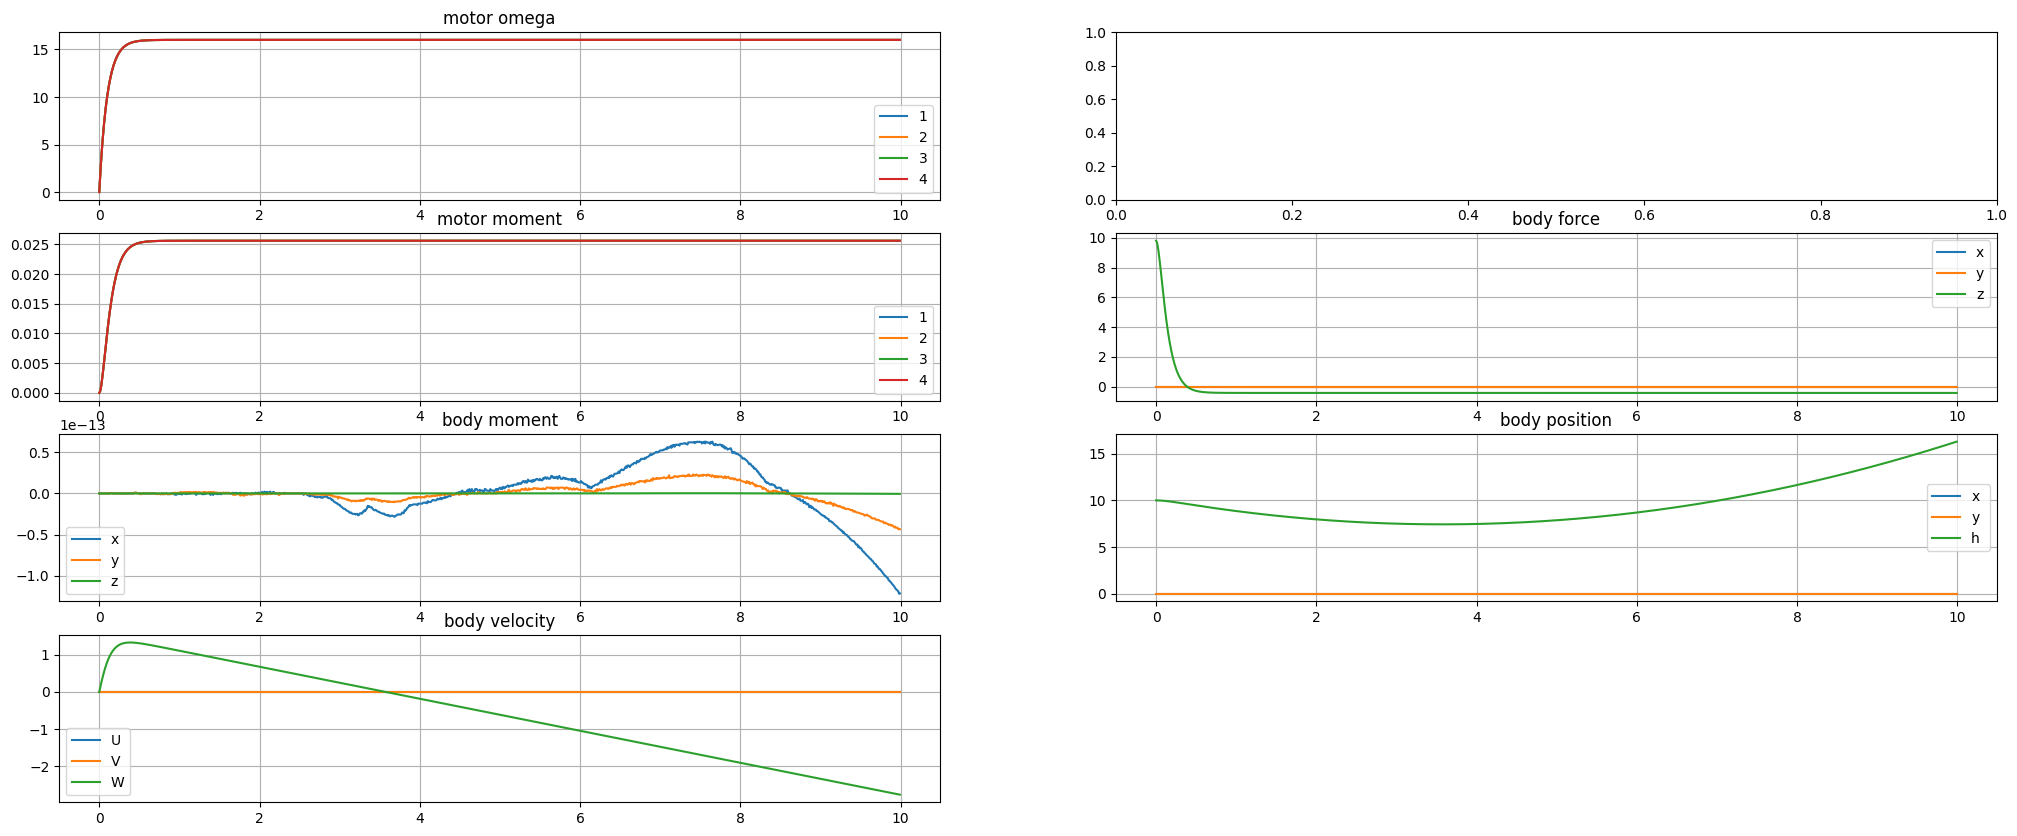

In [ ]:
def sim_and_plotting(model, f_u):

    states = model.dae.x()
    params = model.dae.p()
    w = model.dae.w()

    x0 = model.dae.start(states)
    param_vals = model.dae.start(params)
    
    x0[states.index('h')] = 10
    # param_vals[params.index('m_1_tau')] = 0.1
    # param_vals[params.index('m_2_tau')] = 0.1
    # param_vals[params.index('m_3_tau')] = 0.1
    # param_vals[params.index('m_4_tau')] = 0.1


    # param_vals[params.index('m_1_Cm')] = 0.1
    # param_vals[params.index('m_2_Cm')] = 0.1
    # param_vals[params.index('m_3_Cm')] = 0.1
    # param_vals[params.index('m_4_Cm')] = 0.1

    # param_vals[params.index('m_1_Ct')] = 0.1
    # param_vals[params.index('m_2_Ct')] = 0.1
    # param_vals[params.index('m_3_Ct')] = 0.1
    # param_vals[params.index('m_4_Ct')] = 0.1

    tgrid, res = model.simulate(t0=0, tf=10, dt=0.01, f_u=f_u, x0=x0)

    plt.figure(figsize=(25, 10))

    plt.subplot(4, 2, 1)
    plt.plot(tgrid, res['xf'][12:16, :].T, label=['1', '2', '3', '4'])
    plt.grid()
    plt.title('motor omega')
    plt.legend()

    # print (res.keys())
    get_w = model.dae.create("get_w",['x','u','p'], ['wdef'])
    w_out = get_w(res['xf'], f_u, param_vals)
    # print(w_out.size())
    plt.subplot(4, 2, 2)
    # # plt.plot(tgrid, w_out[14,:].T, label=['1', '2', '3', '4'])
    # plt.plot(tgrid, w_out[[
    #         w.index('m_1_thrust'),
    #         w.index('m_2_thrust'),
    #         w.index('m_3_thrust'),
    #         w.index('m_4_thrust'),
    #     ], :].T, label=['1', '2', '3', '4'])
    # plt.grid()
    # plt.title('motor thrust')
    # plt.legend()

    plt.subplot(4, 2, 3)
    plt.plot(tgrid, w_out[[
            w.index('m_1_moment'),
            w.index('m_2_moment'),
            w.index('m_3_moment'),
            w.index('m_4_moment'),
        ], :].T, label=['1', '2', '3', '4'])
    # plt.plot(tgrid, w_out.T, label=w)
    plt.grid()
    plt.title('motor moment')
    plt.legend()

    plt.subplot(4, 2, 4)
    plt.plot(tgrid, w_out[[
            w.index('F_x'),
            w.index('F_y'),
            w.index('F_z'),
        ], :].T, label=['x', 'y', 'z'])
    plt.grid()
    plt.title('body force')
    plt.legend()

    plt.subplot(4, 2, 5)
    plt.plot(tgrid, w_out[[
            w.index('M_x'),
            w.index('M_y'),
            w.index('M_z'),
        ], :].T, label=['x', 'y', 'z'])
    plt.grid()
    plt.title('body moment')
    plt.legend()


    plt.subplot(4, 2, 6)
    plt.plot(tgrid, res['xf'][[
            states.index('x'),
            states.index('y'),
            states.index('h'),
        ], :].T, label=['x', 'y', 'h '])
    plt.grid()
    plt.title('body position')
    plt.legend()

    plt.subplot(4, 2, 7)
    plt.plot(tgrid, res['xf'][[
            states.index('U'),
            states.index('V'),
            states.index('W'),
        ], :].T, label=['U', 'V', 'W'])
    plt.grid()
    plt.title('body velocity')
    plt.legend()


    # plt.subplot(4, 2, 2)
    # plt.plot(tgrid, res['xf'][[
    #         states.index('if_state_0'),
    #     ], :].T)
    # plt.grid()
    # plt.title('if_state_0')
    # plt.legend()


    # plt.subplot(4, 2, 8)
    # plt.plot(tgrid, res['xf'][[
    #         w.index('R_z'),
    #     ], :].T)
    # plt.grid()
    # plt.title('R_z')
    # plt.legend()

def f_u():
    # aileron, elevator, rudder, throttle
    return np.array([0, 0, 0, 0.5])

model = quadrotor_casadi.Model("quad")
model.display()
sim_and_plotting(model, f_u())

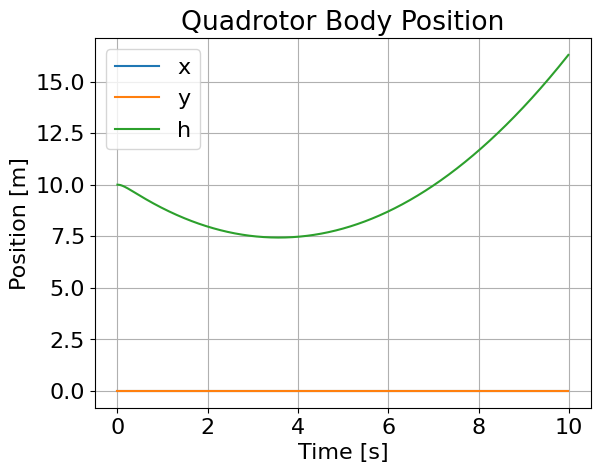

In [15]:
import quadrotor_casadi
import numpy as np
import matplotlib.pyplot as plt

# Set global font size to 16
plt.rcParams.update({'font.size': 16})

model = quadrotor_casadi.Model("quad")

states = model.dae.x()
params = model.dae.p()

x0 = model.dae.start(states)
param_vals = model.dae.start(params)

# Set control input: aileron, elevator, rudder, throttle
inputs = np.array([0, 0, 0, 0.5])

# Set initial height of quadrotor to 10 m.
x0[states.index('h')] = 10
tgrid, res = model.simulate(t0=0, tf=10, dt=0.01, f_u=inputs, x0=x0)

plt.plot(
    tgrid,
    res['xf'][[
        states.index('x'),
        states.index('y'),
        states.index('h'),
    ], :].T,
    label=['x', 'y', 'h']
)
plt.grid()
plt.title('Quadrotor Body Position')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')

# Save as PDF before plt.show()
plt.savefig("quadrotor_casadi.pdf", bbox_inches='tight')
plt.show()
